# econ566 - pset06 - Dili Maduabum, Joshua Bailey

# problem 1

## 1

## 2

### 2.a

The program describes a coordinate descent update for a single coefficient $\beta_j$ of the vector $\beta$ in the context of minimizing the cost function $f(y, X, \beta, \lambda, \alpha)$. Coordinate descent is an optimization algorithm that updates one component of $\beta$ at a time while keeping the other components fixed. Specifically, for the chosen $j$th component, the algorithm seeks to find the value of $\beta_j$ that minimizes $f$, under the constraint that all other components of $\beta$ ($\beta_l$ for all $l \neq j$) are held constant at their current values ($\tilde{\beta}_l$). This approach simplifies the optimization problem because, at each step, it reduces the multidimensional optimization problem to a series of one-dimensional problems. Specifically:

1. For a given iteration, the algorithm selects one component of $\beta$, denoted $\beta_j$, to update. $j$ is an index from the set $\{1, \ldots, p\}$, where $p$ is the total number of predictors in $X$.

2. With all other components of $\beta$ fixed at their current values ($\tilde{\beta}_l$ for $l \neq j$), the algorithm optimizes the value of $\beta_j$. This optimization is done by minimizing the cost function $f$, which is a blend of a squared loss and a regularization term affected by $\lambda$ and $\alpha$.

3. This step is repeated, cycling through each component of $\beta$, updating one component at a time based on the optimization criterion defined above. Each pass through all the components of $\beta$ constitutes an iteration of the coordinate descent algorithm.

4. The process iterates until a stopping criterion is met, typically when changes in the cost function between iterations are below a predetermined threshold, indicating that the algorithm has converged to a minimum (or until a maximum number of iterations is reached).

The advantage of coordinate descent in this setting is its simplicity and efficiency, especially in high-dimensional spaces where traditional gradient descent methods may be computationally expensive. It's particularly well-suited for problems with a large number of features and when the regularization term is present, as it can efficiently handle the sparsity induced by the L1 penalty (lasso) and the shrinkage induced by the L2 penalty (ridge).


### 2.b

In [32]:
import numpy as np
import pandas as pd

# Function to perform soft-thresholding
def soft_thresholding(a, b):
    """
    Soft-thresholding function S(a, b).
    
    :param a: The value to apply thresholding to.
    :param b: The threshold.
    :return: The result of soft-thresholding on a with threshold b.
    """
    return np.sign(a) * max(abs(a) - b, 0)

# Function to update beta_j using coordinate descent
def update_beta_j(y, X, lam, alpha, tilde_beta, j):
    """
    Calculates the updated value of beta_j (beta_j^*) using soft-thresholding.
    
    :param y: The target variable vector.
    :param X: The standardized feature matrix.
    :param lam: The regularization parameter lambda.
    :param alpha: The mixing parameter between L1 and L2 regularization.
    :param tilde_beta: The current estimate of the beta coefficients.
    :param j: The index of the beta coefficient to update.
    :return: The updated value of beta_j.
    """
    n = X.shape[0]
    x_j = X[:, j - 1]  # Adjust for Python's 0-based indexing
    residual = y - np.dot(X, tilde_beta[1:]) + x_j * tilde_beta[j]
    beta_j_candidate = np.dot(x_j, residual) / n
    beta_j_star = soft_thresholding(beta_j_candidate, alpha * lam)
    return beta_j_star

# Load the dataset
data_path = 'ps6.csv'  # Replace with your actual file path
data = pd.read_csv(data_path)

# Extracting Y as the first non-index column (V1)
y = data['V1'].values

# Extracting X (excluding the first two columns: index and target, then all the way to the end)
X = data.iloc[:, 2:].values  # Skip the first (index) and second (target) columns

# Standardize the features
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_standardized = (X - X_mean) / X_std

# Initialize parameters
lam = 0.1  # Regularization parameter lambda
alpha = 0.5  # Mixing parameter between L1 and L2 regularization
np.random.seed(0)  # For reproducibility
n_features = X_standardized.shape[1]
tilde_beta = np.random.randn(n_features + 1)  # +1 for the intercept, initialized randomly

# Choose a feature index j to update (e.g., the second feature)
j = 1

# Update beta_j using the function
beta_j_star = update_beta_j(y, X_standardized, lam, alpha, tilde_beta, j)
print(f"Updated beta_j* for feature index {j}: {beta_j_star}")


Updated beta_j* for feature index 1: -0.3213218689163262


### 2.c

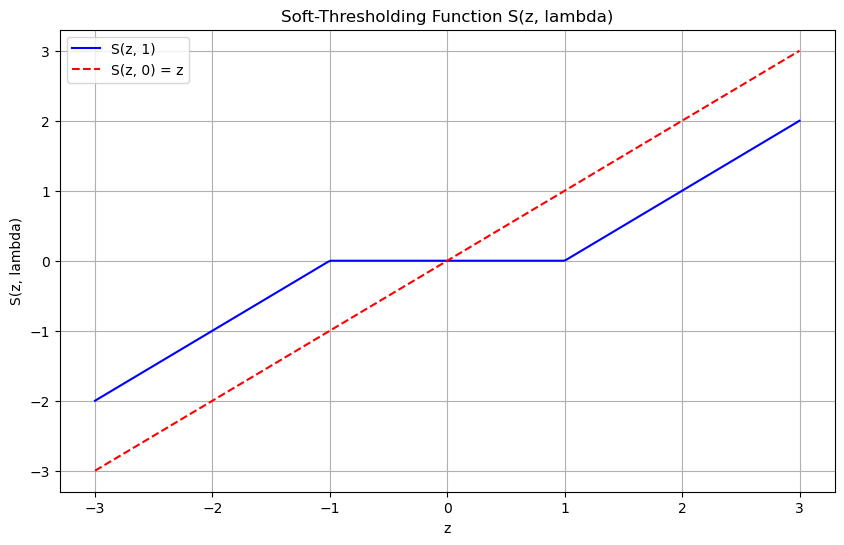

In [33]:
import matplotlib.pyplot as plt

# Define the soft-thresholding function S(z, lambda)
def S(z, lam):
    return np.sign(z) * np.maximum(np.abs(z) - lam, 0)

# Generate a range of z values from -3 to 3
z = np.linspace(-3, 3, 300)

# Calculate S(z, 1) and S(z, 0) for the range of z values
S_z_1 = S(z, 1)
S_z_0 = S(z, 0)  # Equivalent to z, since lam=0 results in no thresholding

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(z, S_z_1, label='S(z, 1)', color='blue')
plt.plot(z, S_z_0, label='S(z, 0) = z', color='red', linestyle='--')

plt.title('Soft-Thresholding Function S(z, lambda)')
plt.xlabel('z')
plt.ylabel('S(z, lambda)')
plt.legend()
plt.grid(True)

plt.show()


$S(z, 0)$ directly corresponds to the update rule in a coordinate descent algorithm for OLS, where there's no regularization applied. Since this function is the identity function, it doesn't alter the value of $z$, implying that all features have the potential to be included in the model without any preference for sparsity. The likelihood of this function outputting zero is practically nil unless $z$ itself is zero, reflecting OLS's tendency to use all available predictors without inducing sparsity.

$S(z, 1)$, on the other hand, illustrates the mechanism behind techniques like Lasso that aim to induce sparsity in the model coefficients. This function will set $z$ to zero if its magnitude is less than the threshold (1 in this case), which directly contributes to sparsity. Given $z$ is uniformly distributed between $[-3, 3]$, there's a one-third chance that $S(z, 1)$ results in zero, significantly higher than with $S(z, 0)$. This illustrates how regularization encourages sparsity by nullifying the effect of variables with coefficients that are not sufficiently large to exceed the threshold, thus prioritizing a simpler model that reduces overfitting and enhances interpretability.

These functions underline a trade-off in model fitting between complexity and simplicity: $S(z, 0)$ allows for a full, possibly overfit model by utilizing all predictors, whereas $S(z, 1)$ (with regularization) promotes a sparser, more interpretable model by excluding predictors that do not contribute sufficiently to the model's predictive power. 


## 3

In [34]:
def cyclic_coordinate_descent_basic(y, X, lam, alpha, epsilon=0.1):
    n, p = X.shape
    beta = np.zeros(p)
    converge = False
    
    while not converge:
        beta_old = beta.copy()
        
        # Update for j=0 (intercept), not regularized
        beta[0] = beta[0] + np.sum(y - np.dot(X, beta)) / n
        
        # Update for j=1,...,p
        for j in range(1, p):
            residual = y - (np.dot(X, beta) - X[:, j] * beta[j])
            rho = np.dot(X[:, j], residual) / n
            beta[j] = soft_thresholding(rho, lam * alpha)
        
        # Check convergence by objective function change
        change = objective_function(y, X, beta, lam, alpha) - objective_function(y, X, beta_old, lam, alpha)
        if np.abs(change) < epsilon:
            converge = True
                
    return beta


## 4

In [35]:
def cyclic_coordinate_descent_active_set(y, X, lam, alpha, epsilon=0.1):
    n, p = X.shape
    beta = np.zeros(p)
    active_set = set(range(p))  # Initially consider all features
    converge = False
    
    while not converge:
        beta_old = beta.copy()
        changes = []
        
        for j in active_set:
            if j == 0:
                # Update for j=0 (intercept), not regularized
                beta[j] = beta[j] + np.sum(y - np.dot(X, beta)) / n
            else:
                # Update for j=1,...,p
                residual = y - (np.dot(X, beta) - X[:, j] * beta[j])
                rho = np.dot(X[:, j], residual) / n
                beta[j] = soft_thresholding(rho, lam * alpha)
        
            # Track changes for convergence checking
            changes.append(np.abs(beta[j] - beta_old[j]))
        
        # Check convergence
        if max(changes) < epsilon:
            if active_set != set(range(p)):
                # If not all features were considered, consider all in the next round
                active_set = set(range(p))
            else:
                # Converged
                converge = True
        else:
            # Update active set based on non-zero coefficients
            active_set = {j for j in range(1, p) if beta[j] != 0}
            # Always include the intercept
            active_set.add(0)
                
    return beta


## 5

In [36]:
def compute_lambda_sequence(y, X, l=100, delta=0.0001):
    n, p = X.shape
    
    # Ensure X is standardized 
    X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    
    # (b) Compute lambda_max
    lambda_max = np.max(np.abs(np.dot(X_std.T, y))) / np.sqrt(n)
    
    # (c) Compute lambda_min
    lambda_min = delta * lambda_max
    
    # (d) Compute the lambda sequence
    log_lambda_min = np.log(lambda_min)
    log_lambda_max = np.log(lambda_max)
    log_lambda_sequence = np.linspace(log_lambda_max, log_lambda_min, l)
    lambda_sequence = np.exp(log_lambda_sequence)
    
    return lambda_sequence

# Note: X_standardized = (X - X.mean(axis=0)) / X.std(axis=0) 
lambda_sequence = compute_lambda_sequence(y, X_standardized)
print(lambda_sequence)


[4.45879351e+02 4.06268658e+02 3.70176871e+02 3.37291378e+02
 3.07327341e+02 2.80025227e+02 2.55148558e+02 2.32481863e+02
 2.11828815e+02 1.93010527e+02 1.75864004e+02 1.60240730e+02
 1.46005386e+02 1.33034670e+02 1.21216236e+02 1.10447720e+02
 1.00635849e+02 9.16956374e+01 8.35496497e+01 7.61273291e+01
 6.93643870e+01 6.32022460e+01 5.75875327e+01 5.24716150e+01
 4.78101813e+01 4.35628566e+01 3.96928525e+01 3.61666488e+01
 3.29537034e+01 3.00261873e+01 2.73587435e+01 2.49282682e+01
 2.27137095e+01 2.06958862e+01 1.88573207e+01 1.71820883e+01
 1.56556789e+01 1.42648716e+01 1.29976197e+01 1.18429470e+01
 1.07908522e+01 9.83222263e+00 8.95875507e+00 8.16288396e+00
 7.43771585e+00 6.77696967e+00 6.17492237e+00 5.62635928e+00
 5.12652903e+00 4.67110232e+00 4.25613446e+00 3.87803121e+00
 3.53351760e+00 3.21960964e+00 2.93358839e+00 2.67297649e+00
 2.43551662e+00 2.21915204e+00 2.02200869e+00 1.84237901e+00
 1.67870713e+00 1.52957542e+00 1.39369215e+00 1.26988038e+00
 1.15706771e+00 1.054277

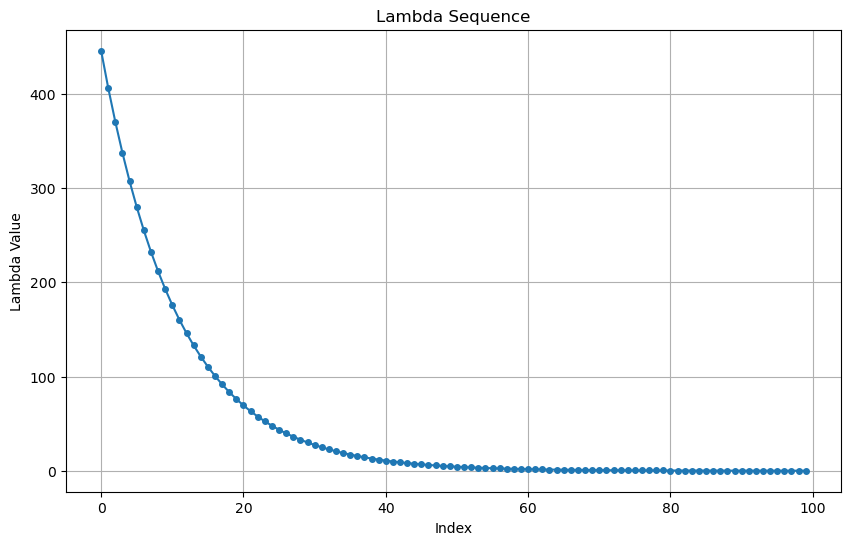

In [37]:
# Plot the lambda sequence.

plt.figure(figsize=(10, 6))
plt.plot(lambda_sequence, marker='o', linestyle='-', markersize=4)
plt.xlabel('Index')
plt.ylabel('Lambda Value')
plt.title('Lambda Sequence')
plt.grid(True)
plt.show()


## 6

In [38]:
import numpy as np

# Define the soft-thresholding function
def soft_thresholding(a, b):
    return np.sign(a) * max(abs(a) - b, 0)

# Compute the lambda sequence
def compute_lambda_sequence(y, X, l=100, delta=0.0001):
    n, p = X.shape
    lambda_max = np.max(np.abs(X.T @ y)) / np.sqrt(n)
    lambda_min = delta * lambda_max
    log_lambda_sequence = np.linspace(np.log(lambda_max), np.log(lambda_min), l)
    return np.exp(log_lambda_sequence)

# Coordinate descent function with warm starts
def cyclic_coordinate_descent(y, X, lambda_sequence, alpha, epsilon=0.001, max_iter=10000):
    n, p = X.shape
    beta = np.zeros(p)
    betas = np.zeros((len(lambda_sequence), p))
    
    for idx, lam in enumerate(lambda_sequence):
        for iteration in range(max_iter):
            beta_old = beta.copy()
            for j in range(p):
                if j == 0:  # update for intercept
                    beta[j] = beta[j] + np.sum(y - np.dot(X, beta)) / n
                else:
                    residual = y - (np.dot(X, beta) - X[:, j] * beta[j])
                    rho = np.dot(X[:, j], residual) / n
                    beta[j] = soft_thresholding(rho, lam * alpha)
            
            # Check convergence
            if np.linalg.norm(beta - beta_old, ord=1) < epsilon * np.linalg.norm(beta_old, ord=1):
                break
        betas[idx] = beta.copy()  # Store the coefficients for this lambda value
    
    return betas

# Assuming we have y and X loaded and preprocessed

# Standardize X (except the first column if it represents the intercept)
X_mean = X[:, 1:].mean(axis=0)
X_std = X[:, 1:].std(axis=0)
X[:, 1:] = (X[:, 1:] - X_mean) / X_std

# Compute the lambda sequence
lambda_sequence = compute_lambda_sequence(y, X)

# Set the alpha for the Elastic Net mixing parameter
alpha = 0.5  # This could be any value in [0,1]

# Perform cyclic coordinate descent with warm starts
betas = cyclic_coordinate_descent(y, X, lambda_sequence, alpha)


KeyboardInterrupt: 

## 7

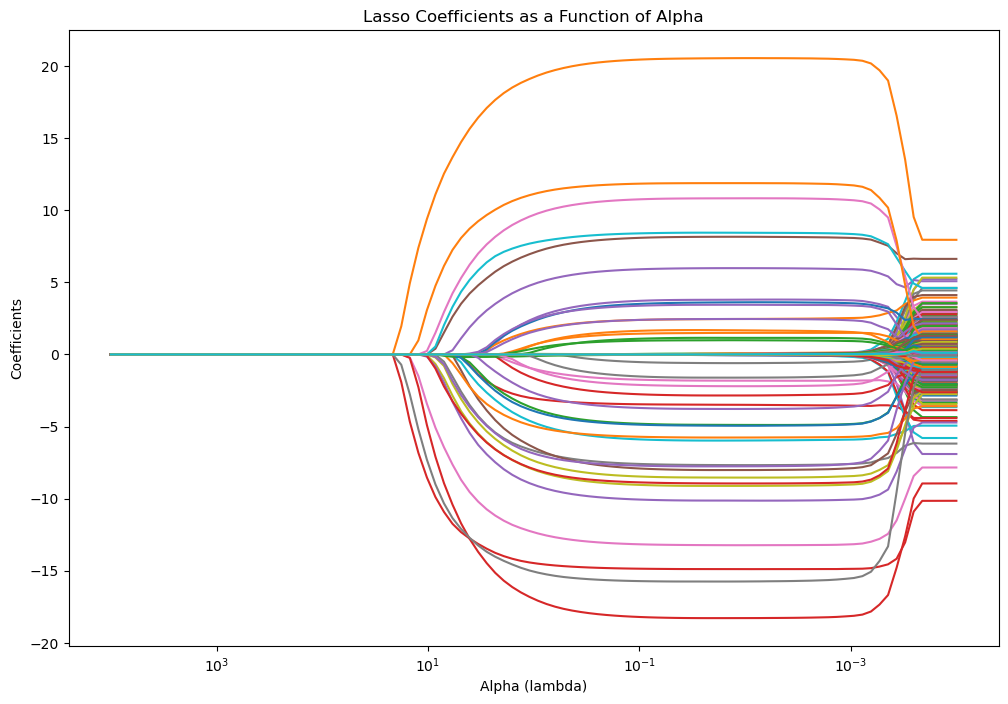

Running time: 97.3505380153656 seconds


In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import time


# Correct extraction of features and target
y = data['V1'].values
X = data.drop(columns=['Unnamed: 0', 'V1']).values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define a range of alphas (lambdas)
alphas = np.logspace(-4, 4, 100)

# Setup 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Placeholder for storing the mean of coefficients across folds for each alpha
coef_paths = np.zeros((len(alphas), X_scaled.shape[1]))

# Measure running time for fitting Lasso models across the lambda grid
start_time = time.time()

for i, alpha in enumerate(alphas):
    coefs_fold = np.zeros((5, X_scaled.shape[1]))  # Temporary storage for coefficients for each fold
    fold = 0
    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]

        lasso = Lasso(alpha=alpha, max_iter=10000, random_state=42)
        lasso.fit(X_train, y_train)
        coefs_fold[fold, :] = lasso.coef_  # Corrected indexing
        fold += 1

    # Average coefficients across folds
    coef_paths[i, :] = np.mean(coefs_fold, axis=0)

end_time = time.time()

# Plotting the coefficient paths
plt.figure(figsize=(12, 8))
for coef_path in coef_paths.T:
    plt.plot(alphas, coef_path)
plt.xscale('log')
plt.xlabel('Alpha (lambda)')
plt.ylabel('Coefficients')
plt.title('Lasso Coefficients as a Function of Alpha')
plt.gca().invert_xaxis()  # Larger alphas (stronger regularization) on the left
plt.show()

# Print running time
print(f"Running time: {end_time - start_time} seconds")


To compare with and without warm starts:

In [53]:
# Define a range of alphas (lambdas)
alphas = np.logspace(-4, 4, 100)

# Placeholder for storing coefficients
coefs = []

# Measure running time for fitting Lasso models across the lambda grid
start_time = time.time()

# Fit Lasso model for each alpha and store coefficients
for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    lasso.fit(X_scaled, y)
    coefs.append(lasso.coef_)

end_time = time.time()


# Print running time
print(f"Running time: {end_time - start_time:.2f} seconds")


Running time: 19.71 seconds


You can't easily turn off warm starts in this package, so I have simulated the effect manually here:

In [45]:
# Manually fitting models for each alpha (inefficient)
start_time_without_warm_start = time.time()

coef_paths_manual = np.zeros((len(alphas), X_scaled.shape[1]))
for i, alpha in enumerate(alphas):
    lasso_manual = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    lasso_manual.fit(X_scaled, y)
    coef_paths_manual[i, :] = lasso_manual.coef_

end_time_without_warm_start = time.time()

# Report running time without warm starts
print(f"Running time without warm starts (inefficient method): {end_time_without_warm_start - start_time_without_warm_start:.2f} seconds")


Running time without warm starts (inefficient method): 19.64 seconds


## 8

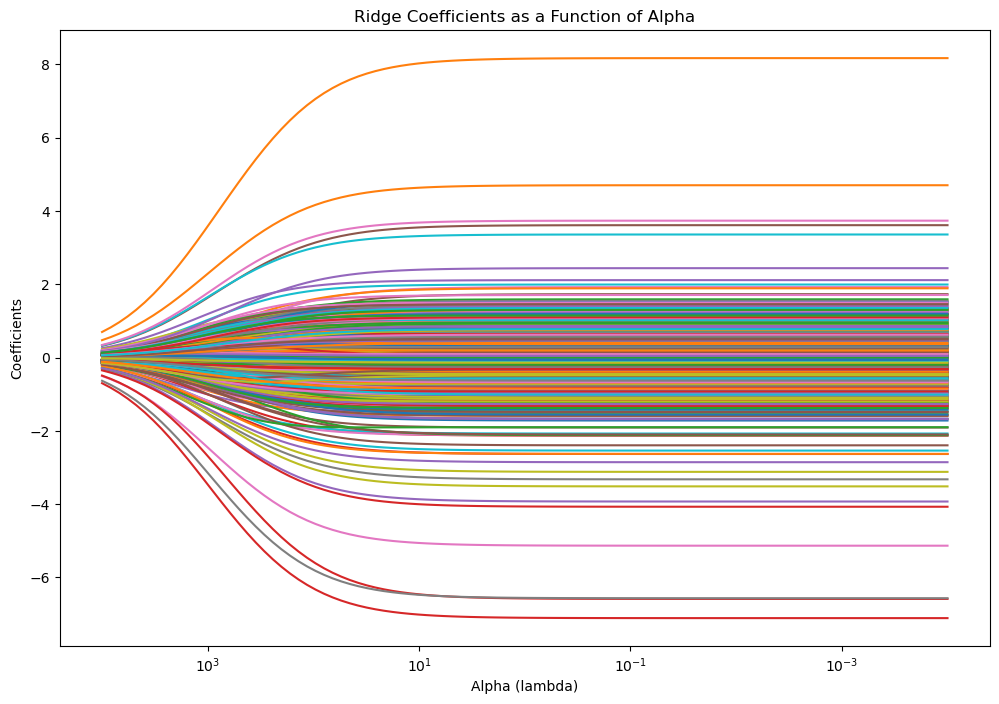

Running time for Ridge regression: 5.991420030593872 seconds


In [54]:
from sklearn.linear_model import Ridge

# Define a range of alphas (lambdas) for Ridge
alphas = np.logspace(-4, 4, 100)

# Initialize storage for coefficients
coef_paths = np.zeros((len(alphas), X_scaled.shape[1]))

# 5-Fold Cross-Validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Measure running time for Ridge regression across the alpha grid
start_time = time.time()

for i, alpha in enumerate(alphas):
    coefs_fold = np.zeros((5, X_scaled.shape[1]))
    fold = 0
    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        ridge = Ridge(alpha=alpha, max_iter=10000, random_state=42)
        ridge.fit(X_train, y_train)
        coefs_fold[fold, :] = ridge.coef_
        fold += 1

    coef_paths[i, :] = np.mean(coefs_fold, axis=0)

end_time = time.time()

# Plotting the coefficient paths
plt.figure(figsize=(12, 8))
for coef_path in coef_paths.T:
    plt.plot(alphas, coef_path)
plt.xscale('log')
plt.xlabel('Alpha (lambda)')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients as a Function of Alpha')
plt.gca().invert_xaxis()
plt.show()

# Print running time
print(f"Running time for Ridge regression: {end_time - start_time} seconds")


## 9

In [55]:
from sklearn.linear_model import ElasticNetCV

# Define the alpha grid for the Elastic Net mixing parameter, excluding 0 to avoid the error
l1_ratios = np.linspace(0.1, 1, 10)  # 0.1 to 1 inclusive, in steps of 0.1

# Manually define a range of lambda values (alphas in sklearn) to use for ElasticNetCV
alphas = np.logspace(-4, 4, 100)

# Measure running time for ElasticNetCV with 5-fold CV
start_time = time.time()

elastic_net_cv = ElasticNetCV(l1_ratio=l1_ratios, alphas=alphas, cv=5, random_state=42, max_iter=10000)
elastic_net_cv.fit(X_scaled, y)

end_time = time.time()

# Running time
print(f"Running time for ElasticNetCV with 5-fold CV: {end_time - start_time} seconds")

# Plotting the results
# Best alpha and l1_ratio found
print(f"Best alpha (lambda): {elastic_net_cv.alpha_}")
print(f"Best l1_ratio: {elastic_net_cv.l1_ratio_}")

# Optionally, plot the coefficient path as a function of alpha for the best l1_ratio
# This requires fitting models for each alpha, which is beyond the current ElasticNetCV output


Running time for ElasticNetCV with 5-fold CV: 20.986112594604492 seconds
Best alpha (lambda): 0.03853528593710531
Best l1_ratio: 1.0


## 10

In [56]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
import numpy as np

# Assuming X_scaled (normalized features) and y (target) are already defined

# Fit Lasso model
lasso = Lasso(alpha=0.1)  # Alpha is the regularization strength
lasso.fit(X_scaled, y)

# Fit Ridge model
ridge = Ridge(alpha=0.1)
ridge.fit(X_scaled, y)

# Fit Elastic Net model with a significant L1 ratio
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.7)  # L1 ratio closer to 1 favors sparsity
elastic_net.fit(X_scaled, y)

# Compare the number of non-zero coefficients
non_zero_lasso = np.sum(lasso.coef_ != 0)
non_zero_ridge = np.sum(ridge.coef_ != 0)
non_zero_elastic_net = np.sum(elastic_net.coef_ != 0)

print(f"Non-zero coefficients in Lasso: {non_zero_lasso}")
print(f"Non-zero coefficients in Ridge: {non_zero_ridge}")
print(f"Non-zero coefficients in Elastic Net: {non_zero_elastic_net}")


Non-zero coefficients in Lasso: 40
Non-zero coefficients in Ridge: 1000
Non-zero coefficients in Elastic Net: 494


These results seem to make sense:

- Lasso employs an L1 penalty, which is known for inducing sparsity in the model by driving many coefficients to exactly zero. A result showing only 40 non-zero coefficients out of potentially thousands indicates that Lasso has effectively reduced the model complexity by selecting only the most informative features, which is a desirable outcome for feature selection and model interpretability.

- Ridge regression uses an L2 penalty, which does not encourage sparsity in the same way L1 does. Instead, it tends to shrink the coefficients towards zero but rarely sets them exactly to zero. Thus, seeing all or nearly all coefficients as non-zero is expected with Ridge, which means it does not inherently select features but rather minimizes overfitting by penalizing large coefficients.

- The Elastic Net combines L1 and L2 penalties and can thus induce some level of sparsity while also benefiting from the regularization properties of L2. The number of non-zero coefficients being between Lasso and Ridge is consistent with this blend of penalties. The exact degree of sparsity depends on the `l1_ratio` parameter: closer to 1 would behave more like Lasso, and closer to 0 more like Ridge. With 494 non-zero coefficients, it indicates that Elastic Net has enforced some sparsity (though less than Lasso) while also leveraging the Ridge penalty to manage the magnitude of coefficients.


## 11

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("reg.csv")

# Preparing the dataset
n = data.shape[0]  # Number of observations
ones_column = np.ones((n, 1))  # Column of ones for the intercept
data.insert(loc=2, column='ones', value=ones_column)

# Subset y and make it a column vector
y = np.array(data["y"]).reshape(-1, 1)

# All rows, column 3 and above, including a column of ones for our intercept
X = np.array(data.iloc[:, 2:])

# Initializing beta vector
B_0 = np.zeros((X.shape[1], 1))

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [60]:
def cyclic_coordinate_descent(X, y, B_0, epsilon=0.0001, max_iter=1000):
    m, n = X.shape
    B = B_0.copy()
    for iteration in range(max_iter):
        for j in range(n):
            # Compute the prediction excluding the current feature
            y_pred = X @ B - X[:, j].reshape(-1, 1) * B[j]
            # Update the coefficient for the j-th feature
            B[j] = np.dot(X[:, j], (y - y_pred)) / np.dot(X[:, j], X[:, j])
        
        # Compute the current error
        current_error = np.mean((y - X @ B) ** 2)
        if current_error < epsilon:
            break
    return B


/var/folders/8t/tpbcw7_d5k18f1xhtb_sl2cc0000gn/T/ipykernel_59160/204139700.py:55: RuntimeWarning: invalid value encountered in divide
  B[j] = np.dot(X[:, j], (y - y_pred)) / np.dot(X[:, j], X[:, j])


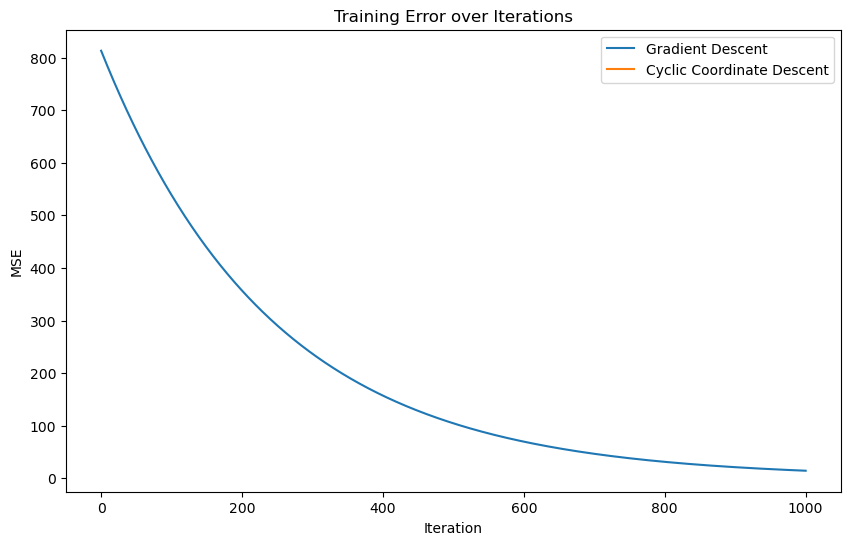

Gradient Descent Running Time: 0.59 seconds
Cyclic Coordinate Descent Running Time: 2.95 seconds


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import time

# Load the dataset
data = pd.read_csv("reg.csv")

# Preparing the dataset
n = data.shape[0]
data.insert(2, 'ones', np.ones((n, 1)))

y = np.array(data["y"]).reshape(-1, 1)
X = np.array(data.iloc[:, 2:])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# MSE and Gradient Functions
def mse(X, y, beta):
    predictions = X @ beta
    errors = predictions - y
    return np.mean(errors ** 2)

def mse_gradient(X, y, beta):
    N = X.shape[0]
    predictions = X @ beta
    return (2/N) * X.T @ (predictions - y)

# Batch Gradient Descent
def gradient_descent(X, y, B_0, step_size, epsilon=0.0001, max_iter=1000):
    B = B_0.copy()
    errors = [mse(X, y, B)]
    
    for iteration in range(max_iter):
        grad = mse_gradient(X, y, B)
        B -= step_size * grad
        error = mse(X, y, B)
        errors.append(error)
        if np.linalg.norm(grad) < epsilon:
            break
    return B, errors

# Cyclic Coordinate Descent with error tracking
def cyclic_coordinate_descent(X, y, B_0, epsilon=0.0001, max_iter=1000):
    m, n = X.shape
    B = B_0.copy()
    errors = [mse(X, y, B)]
    
    for iteration in range(max_iter):
        for j in range(n):
            y_pred = X @ B - X[:, j].reshape(-1, 1) * B[j]
            B[j] = np.dot(X[:, j], (y - y_pred)) / np.dot(X[:, j], X[:, j])
        error = mse(X, y, B)
        errors.append(error)
        if error < epsilon:
            break
    return B, errors

# Initial beta vector
B_0 = np.zeros((X_scaled.shape[1], 1))

# Gradient Descent Parameters
step_size = 0.001

# Run Batch Gradient Descent
start_time_gd = time.time()
B_gd, errors_gd = gradient_descent(X_scaled, y, B_0, step_size)
end_time_gd = time.time()

# Run Cyclic Coordinate Descent
start_time_ccd = time.time()
B_ccd, errors_ccd = cyclic_coordinate_descent(X_scaled, y, B_0)
end_time_ccd = time.time()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(errors_gd, label='Gradient Descent')
plt.plot(errors_ccd, label='Cyclic Coordinate Descent')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('Training Error over Iterations')
plt.legend()
plt.show()

# Print running times
print(f"Gradient Descent Running Time: {end_time_gd - start_time_gd:.2f} seconds")
print(f"Cyclic Coordinate Descent Running Time: {end_time_ccd - start_time_ccd:.2f} seconds")


/var/folders/8t/tpbcw7_d5k18f1xhtb_sl2cc0000gn/T/ipykernel_59160/1675001186.py:61: RuntimeWarning: invalid value encountered in divide
  B[j] = np.dot(X[:, j], (y - y_pred)) / np.dot(X[:, j], X[:, j])


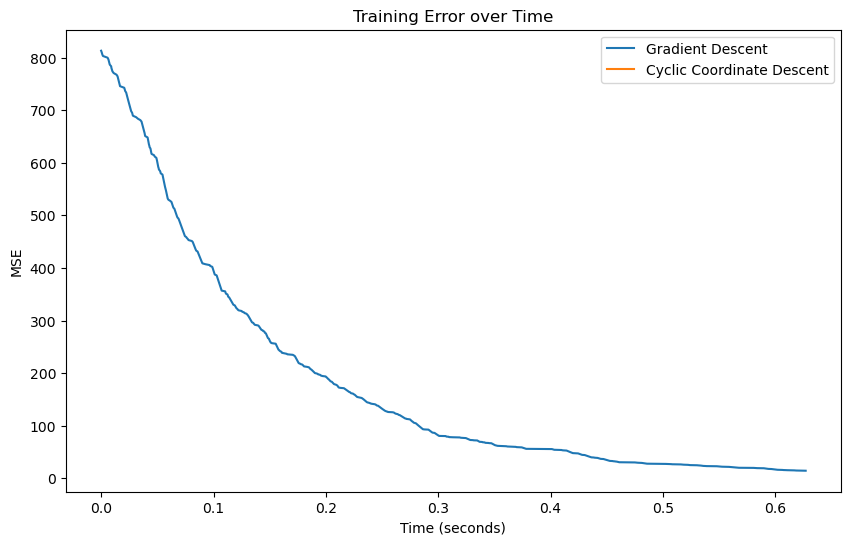

Gradient Descent Total Running Time: 0.63 seconds
Cyclic Coordinate Descent Total Running Time: 2.56 seconds


In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import time

# Load the dataset
data = pd.read_csv("reg.csv")

# Preparing the dataset
n = data.shape[0]
data.insert(2, 'ones', np.ones((n, 1)))

y = np.array(data["y"]).reshape(-1, 1)
X = np.array(data.iloc[:, 2:])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# MSE function
def mse(X, y, beta):
    predictions = X @ beta
    errors = predictions - y
    return np.mean(errors ** 2)

# Gradient of MSE function
def mse_gradient(X, y, beta):
    N = X.shape[0]
    predictions = X @ beta
    return (2/N) * X.T @ (predictions - y)

# Batch Gradient Descent with time tracking
def gradient_descent_time(X, y, B_0, step_size, epsilon=0.0001, max_iter=1000):
    B = B_0.copy()
    errors = [mse(X, y, B)]  # Initial error
    times = [0]  # Initial time is 0
    
    for iteration in range(max_iter):
        start_time = time.time()
        grad = mse_gradient(X, y, B)
        B -= step_size * grad
        errors.append(mse(X, y, B))
        times.append(time.time() - start_time)
        if np.linalg.norm(grad) < epsilon:
            break
    cumulative_time = np.cumsum(times)
    return B, errors, cumulative_time

# Cyclic Coordinate Descent with time tracking
def cyclic_coordinate_descent_time(X, y, B_0, epsilon=0.0001, max_iter=1000):
    m, n = X.shape
    B = B_0.copy()
    errors = [mse(X, y, B)]  # Initial error
    times = [0]  # Initial time is 0
    
    for iteration in range(max_iter):
        start_time = time.time()
        for j in range(n):
            y_pred = X @ B - X[:, j].reshape(-1, 1) * B[j]
            B[j] = np.dot(X[:, j], (y - y_pred)) / np.dot(X[:, j], X[:, j])
        errors.append(mse(X, y, B))
        times.append(time.time() - start_time)
        if errors[-1] < epsilon:
            break
    cumulative_time = np.cumsum(times)
    return B, errors, cumulative_time

# Initial beta vector
B_0 = np.zeros((X_scaled.shape[1], 1))

# Gradient Descent Parameters
step_size = 0.001

# Run Batch Gradient Descent with time tracking
B_gd, errors_gd, times_gd = gradient_descent_time(X_scaled, y, B_0, step_size)

# Run Cyclic Coordinate Descent with time tracking
B_ccd, errors_ccd, times_ccd = cyclic_coordinate_descent_time(X_scaled, y, B_0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(times_gd, errors_gd, label='Gradient Descent')
plt.plot(times_ccd, errors_ccd, label='Cyclic Coordinate Descent')
plt.xlabel('Time (seconds)')
plt.ylabel('MSE')
plt.title('Training Error over Time')
plt.legend()
plt.show()

# Print running times
print(f"Gradient Descent Total Running Time: {times_gd[-1]:.2f} seconds")
print(f"Cyclic Coordinate Descent Total Running Time: {times_ccd[-1]:.2f} seconds")


# problem 2

## 1

In [71]:
import pandas as pd

ps6 = pd.read_csv("ps6.csv")
y = ps6.iloc[:, 1:2].values  #only second row, make it NP
X = ps6.iloc[:, 2:].values 

#no. of obs (500)
n = ps6.shape[0] 

#no. of parameters (1000)
p = ps6.shape[1]- 2


def left_hand_side(X, y, p, lambd = 1):
    I_p = np.eye(p)
    X_T = X.T
    return np.dot(np.linalg.inv(np.dot(X_T,X) + lambd*I_p), np.dot(X_T, y))


def right_hand_side(X, y, n, lambd = 1):
    I_n = np.eye(n)
    X_T = X.T
    return np.dot(X_T, np.dot(np.linalg.inv(np.dot(X,X_T) + lambd*I_n), y))



#printing the first k values side by side
k = 9
print(np.column_stack((left_hand_size(X, y,p)[:k], right_hand_side(X, y, n)[:k])))

#They are the same

[[-0.40274169 -0.40274169]
 [-0.37224581 -0.37224581]
 [ 0.3971004   0.3971004 ]
 [-0.4871457  -0.4871457 ]
 [-1.51206562 -1.51206562]
 [-0.46725157 -0.46725157]
 [ 0.1570547   0.1570547 ]
 [-1.56853149 -1.56853149]
 [-0.38892184 -0.38892184]]
